## Resize bộ dữ liệu về kích thước 224x224 để huấn luyện mô hình CNN

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/AI_Fish_Classification/data_fish_in_real_time/filtered_images.zip \
      -d /content/fish_data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/fish_data/filtered_images/Syngnathidae/59eafd18-3e6a-4569-bdfa-5bcdac4497a1.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5a55b468-8cb1-4e19-ab6f-9cda555aec8c.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5a71de03-b8bb-4a54-b089-1762755965ea.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5acd3221-9dd5-4f64-a266-3d1cf85a3da5.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5ace4cc3-2992-4a03-b039-a6d39ccc1868.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5ada0612-4e42-4dde-8c89-5d254c30d5a1.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5b19edf1-6ef1-479b-bbf1-e93f6bae5dd7.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5b2ca458-85bd-41cf-bc5a-4bad300fd824.jpg  
  inflating: /content/fish_data/filtered_images/Syngnathidae/5b37c780-de91-488e-a47a-d56c02893af7.jpg  
  infla

In [ ]:
!unzip /content/drive/MyDrive/AI_Fish_Classification/code/YOLO/bbox.zip \
      -d /content/data_labels

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: /content/data_labels/all_family/Odontaspididae/0c41fc1a-2fbe-4fef-b448-13e0a7e29798.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/8e185faa-f9fc-4b6f-ab04-70aaa021f4b9.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/c2fb4d2b-dee5-45c1-b215-1f1533bb94e4.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/86f3181f-ce32-4af1-a368-97e56493618c.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/833888bf-9000-4108-b922-21f9a305c259.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/7a2a0016-d215-4f39-87a6-e7f0d6b3fa24.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/0e23e7b7-a2df-4672-aa65-cc58875d6ae2.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/0f4cce5d-9314-4eaa-96d1-a870f7faadd1.txt  
 extracting: /content/data_labels/all_family/Odontaspididae/7474f7b4-70d7-42c4-ae7a-7d2e6453488b.txt  
 extracting: /co

In [ ]:
# ===============================
# 0. ĐẾM SỐ LƯỢNG ẢNH BAN ĐẦU
# ===============================
print("===== SỐ LƯỢNG ẢNH BAN ĐẦU =====")
initial_total = 0
initial_per_family = {}

for family in os.listdir(image_root):
    fam_path = os.path.join(image_root, family)
    if not os.path.isdir(fam_path):
        continue

    imgs = [
        f for f in os.listdir(fam_path)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    count = len(imgs)
    initial_total += count
    initial_per_family[family] = count

    print(f"{family}: {count} ảnh")

print("----------------------------------")
print(f"Tổng cộng ban đầu: {initial_total} ảnh\n")


===== SỐ LƯỢNG ẢNH BAN ĐẦU =====
Rhinidae: 19 ảnh
Ailiidae: 15 ảnh
Gigantactinidae: 5 ảnh
Anablepidae: 18 ảnh
Osteoglossidae: 35 ảnh
Ostraciidae: 871 ảnh
Albulidae: 25 ảnh
Nemipteridae: 245 ảnh
Sternoptychidae: 49 ảnh
Mochokidae: 202 ảnh
Catostomidae: 392 ảnh
Artedidraconidae: 27 ảnh
Ambassidae: 55 ảnh
Trichiuridae: 32 ảnh
Hemiramphidae: 68 ảnh
Pomatomidae: 181 ảnh
Acheilognathidae: 68 ảnh
Macrouridae: 16 ảnh
Hoplichthyidae: 6 ảnh
Sillaginidae: 40 ảnh
Callorhinchidae: 14 ảnh
Tripterygiidae: 552 ảnh
Monodactylidae: 166 ảnh
Labridae: 5251 ảnh
Oreosomatidae: 8 ảnh
Gempylidae: 35 ảnh
Toxotidae: 13 ảnh
Sisoridae: 159 ảnh
Solenostomidae: 17 ảnh
Notosudidae: 9 ảnh
Serrasalmidae: 145 ảnh
Diretmidae: 7 ảnh
Bedotiidae: 18 ảnh
Pangasiidae: 60 ảnh
Latilidae: 51 ảnh
Prochilodontidae: 31 ảnh
Hemerocoetidae: 9 ảnh
Plesiopidae: 230 ảnh
Berycidae: 23 ảnh
Hypopomidae: 19 ảnh
Creediidae: 7 ảnh
Notacanthidae: 14 ảnh
Embiotocidae: 35 ảnh
Odontobutidae: 21 ảnh
Amiidae: 213 ảnh
Drepaneidae: 13 ảnh
Malacanthi

In [ ]:
import os
import cv2
import shutil
from concurrent.futures import ThreadPoolExecutor

# ===============================
# 1. PATH
# ===============================
image_root = "/content/fish_data/filtered_images"     # Ảnh gốc theo family
label_root = "/content/data_labels/all_family"        # Nhãn bbox theo family
output_root = "/content/processed_fish"               # Lưu ảnh crop + resize trên RAM

# ===============================
# 2. XÓA THƯ MỤC OUTPUT CŨ
# ===============================
if os.path.exists(output_root):
    shutil.rmtree(output_root)

os.makedirs(output_root, exist_ok=True)

# ===============================
# 3. HÀM XỬ LÝ 1 ẢNH
# ===============================
def process_image(family, img_path):
    img_name = os.path.splitext(os.path.basename(img_path))[0]

    # file nhãn
    label_path = os.path.join(label_root, family, img_name + ".txt")
    if not os.path.exists(label_path):
        print("Không tìm thấy nhãn:", label_path)
        return

    # đọc ảnh
    img = cv2.imread(img_path)
    if img is None:
        print("Lỗi đọc ảnh:", img_path)
        return
    h, w = img.shape[:2]

    # đọc nhãn (mỗi ảnh 1 bbox duy nhất hoặc nhiều bbox, con muốn lấy hết)
    with open(label_path, "r") as f:
        lines = f.readlines()

    # folder output theo loài
    out_dir = os.path.join(output_root, family)
    os.makedirs(out_dir, exist_ok=True)

    # xử lý từng bbox
    for idx, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        fam, x_min, y_min, width, height = parts
        x_min = float(x_min)
        y_min = float(y_min)
        width = float(width)
        height = float(height)

        # ==== crop ảnh theo bbox ====
        x1 = max(int(x_min), 0)
        y1 = max(int(y_min), 0)
        x2 = min(int(x_min + width), w)
        y2 = min(int(y_min + height), h)

        crop = img[y1:y2, x1:x2]
        if crop.size == 0:
            print("Bbox lỗi:", img_path)
            continue

        # ==== resize 224×224 ====
        crop_resized = cv2.resize(crop, (224, 224))

        # ==== lưu ảnh ====
        out_name = f"{img_name}_{idx}.jpg"
        out_path = os.path.join(out_dir, out_name)
        cv2.imwrite(out_path, crop_resized)

# ===============================
# 4. DUYỆT TẤT CẢ ẢNH & ĐA LUỒNG
# ===============================
tasks = []
for family in os.listdir(image_root):
    fam_path = os.path.join(image_root, family)
    if not os.path.isdir(fam_path):
        continue

    for f in os.listdir(fam_path):
        if f.lower().endswith((".jpg", ".png", ".jpeg")):
            tasks.append((family, os.path.join(fam_path, f)))

print("Tổng số ảnh cần xử lý:", len(tasks))

# chạy đa luồng cho nhanh
with ThreadPoolExecutor(max_workers=12) as executor:
    executor.map(lambda item: process_image(item[0], item[1]), tasks)

print("🎉 DONE! Tất cả ảnh đã được crop + resize 224x224 trong RAM:", output_root)


Tổng số ảnh cần xử lý: 84680
🎉 DONE! Tất cả ảnh đã được crop + resize 224x224 trong RAM: /content/processed_fish



===== SỐ LƯỢNG ẢNH SAU XỬ LÝ =====
Acanthuridae: 1885 ảnh
Acestrorhynchidae: 26 ảnh
Acheilognathidae: 79 ảnh
Achiridae: 41 ảnh
Acipenseridae: 80 ảnh
Acropomatidae: 10 ảnh
Adrianichthyidae: 29 ảnh
Aetobatidae: 238 ảnh
Agonidae: 58 ảnh
Ailiidae: 17 ảnh
Akysidae: 47 ảnh
Albulidae: 25 ảnh
Alepisauridae: 12 ảnh
Alepocephalidae: 44 ảnh
Alestidae: 101 ảnh
Alopiidae: 13 ảnh
Ambassidae: 59 ảnh
Amblycipitidae: 34 ảnh
Amblyopsidae: 6 ảnh
Amiidae: 219 ảnh
Ammodytidae: 24 ảnh
Amphiliidae: 87 ảnh
Anabantidae: 55 ảnh
Anablepidae: 20 ảnh
Anacanthobatidae: 6 ảnh
Anarhichadidae: 28 ảnh
Anguillidae: 273 ảnh
Anomalopidae: 13 ảnh
Anoplogastridae: 5 ảnh
Anoplopomatidae: 6 ảnh
Anostomidae: 124 ảnh
Antennariidae: 150 ảnh
Antigoniidae: 12 ảnh
Aphaniidae: 65 ảnh
Apistidae: 7 ảnh
Aploactinidae: 31 ảnh
Aplocheilidae: 36 ảnh
Aplodactylidae: 5 ảnh
Apogonidae: 1106 ảnh
Apteronotidae: 19 ảnh
Aracanidae: 213 ảnh
Argentinidae: 16 ảnh
Arhynchobatidae: 113 ảnh
Ariidae: 401 ảnh
Ariommatidae: 13 ảnh
Arripidae: 10 ảnh
Arte

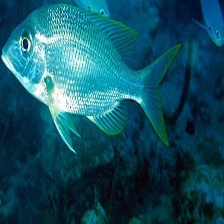


📌 Labridae — Hasca_u0_0.jpg


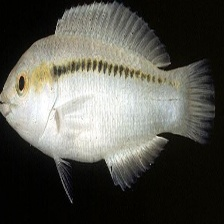


📌 Leuciscidae — Rurub_m3_0.jpg


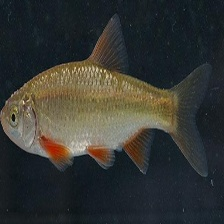


📌 Leuciscidae — Cyspi_ui_0.jpg


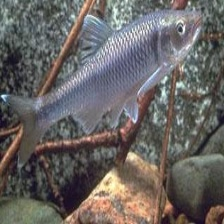


📌 Sparidae — 45f6afe7-c43f-4477-a9dc-bc2fc57881d2_0.jpg


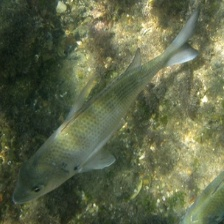


📌 Scaridae — Chbow_u0_0.jpg


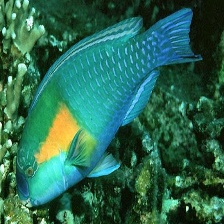


📌 Ginglymostomatidae — 419272cd-eceb-419d-8782-11873d844e2e_0.jpg


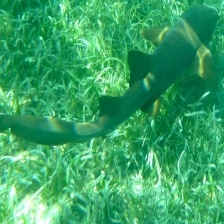


📌 Fundulidae — e24fe47e-fd60-4298-a3b1-cafb6427f2af_0.jpg


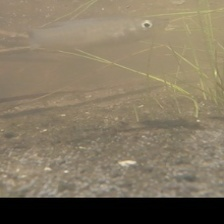


📌 Poeciliidae — 86b74477-cfb6-4823-8be1-4751498df9b2_6.jpg


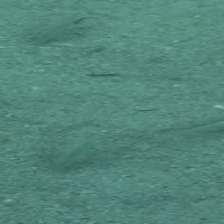


📌 Diodontidae — Dihol_ud_0.jpg


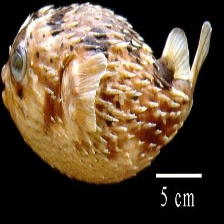

In [ ]:
print("\n===== SỐ LƯỢNG ẢNH SAU XỬ LÝ =====")
total = 0

all_images = []   # dùng cho bước random 10 ảnh

for family in sorted(os.listdir(output_root)):
    fam_dir = os.path.join(output_root, family)
    if not os.path.isdir(fam_dir):
        continue

    imgs = [os.path.join(fam_dir, f) for f in os.listdir(fam_dir) if f.endswith(".jpg")]
    count = len(imgs)
    total += count

    all_images.extend(imgs)

    print(f"{family}: {count} ảnh")

print("----------------------------------")
print(f"🔢 Tổng cộng: {total} ảnh sau xử lý")


# ===============================
# 6. IN 10 ẢNH NGẪU NHIÊN
# ===============================
print("\n===== 10 ẢNH NGẪU NHIÊN =====")

sample_imgs = random.sample(all_images, 10) if len(all_images) >= 10 else all_images

for img_path in sample_imgs:
    family = os.path.basename(os.path.dirname(img_path))
    print(f"{family} — {os.path.basename(img_path)}")

    img = cv2.imread(img_path)
    cv2_imshow(img)
    print()